In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os

sns.set()
df = pd.read_csv('csv_visite2w.txt')
df['start'] = pd.to_datetime(df['start'].astype("datetime64[ms]"))

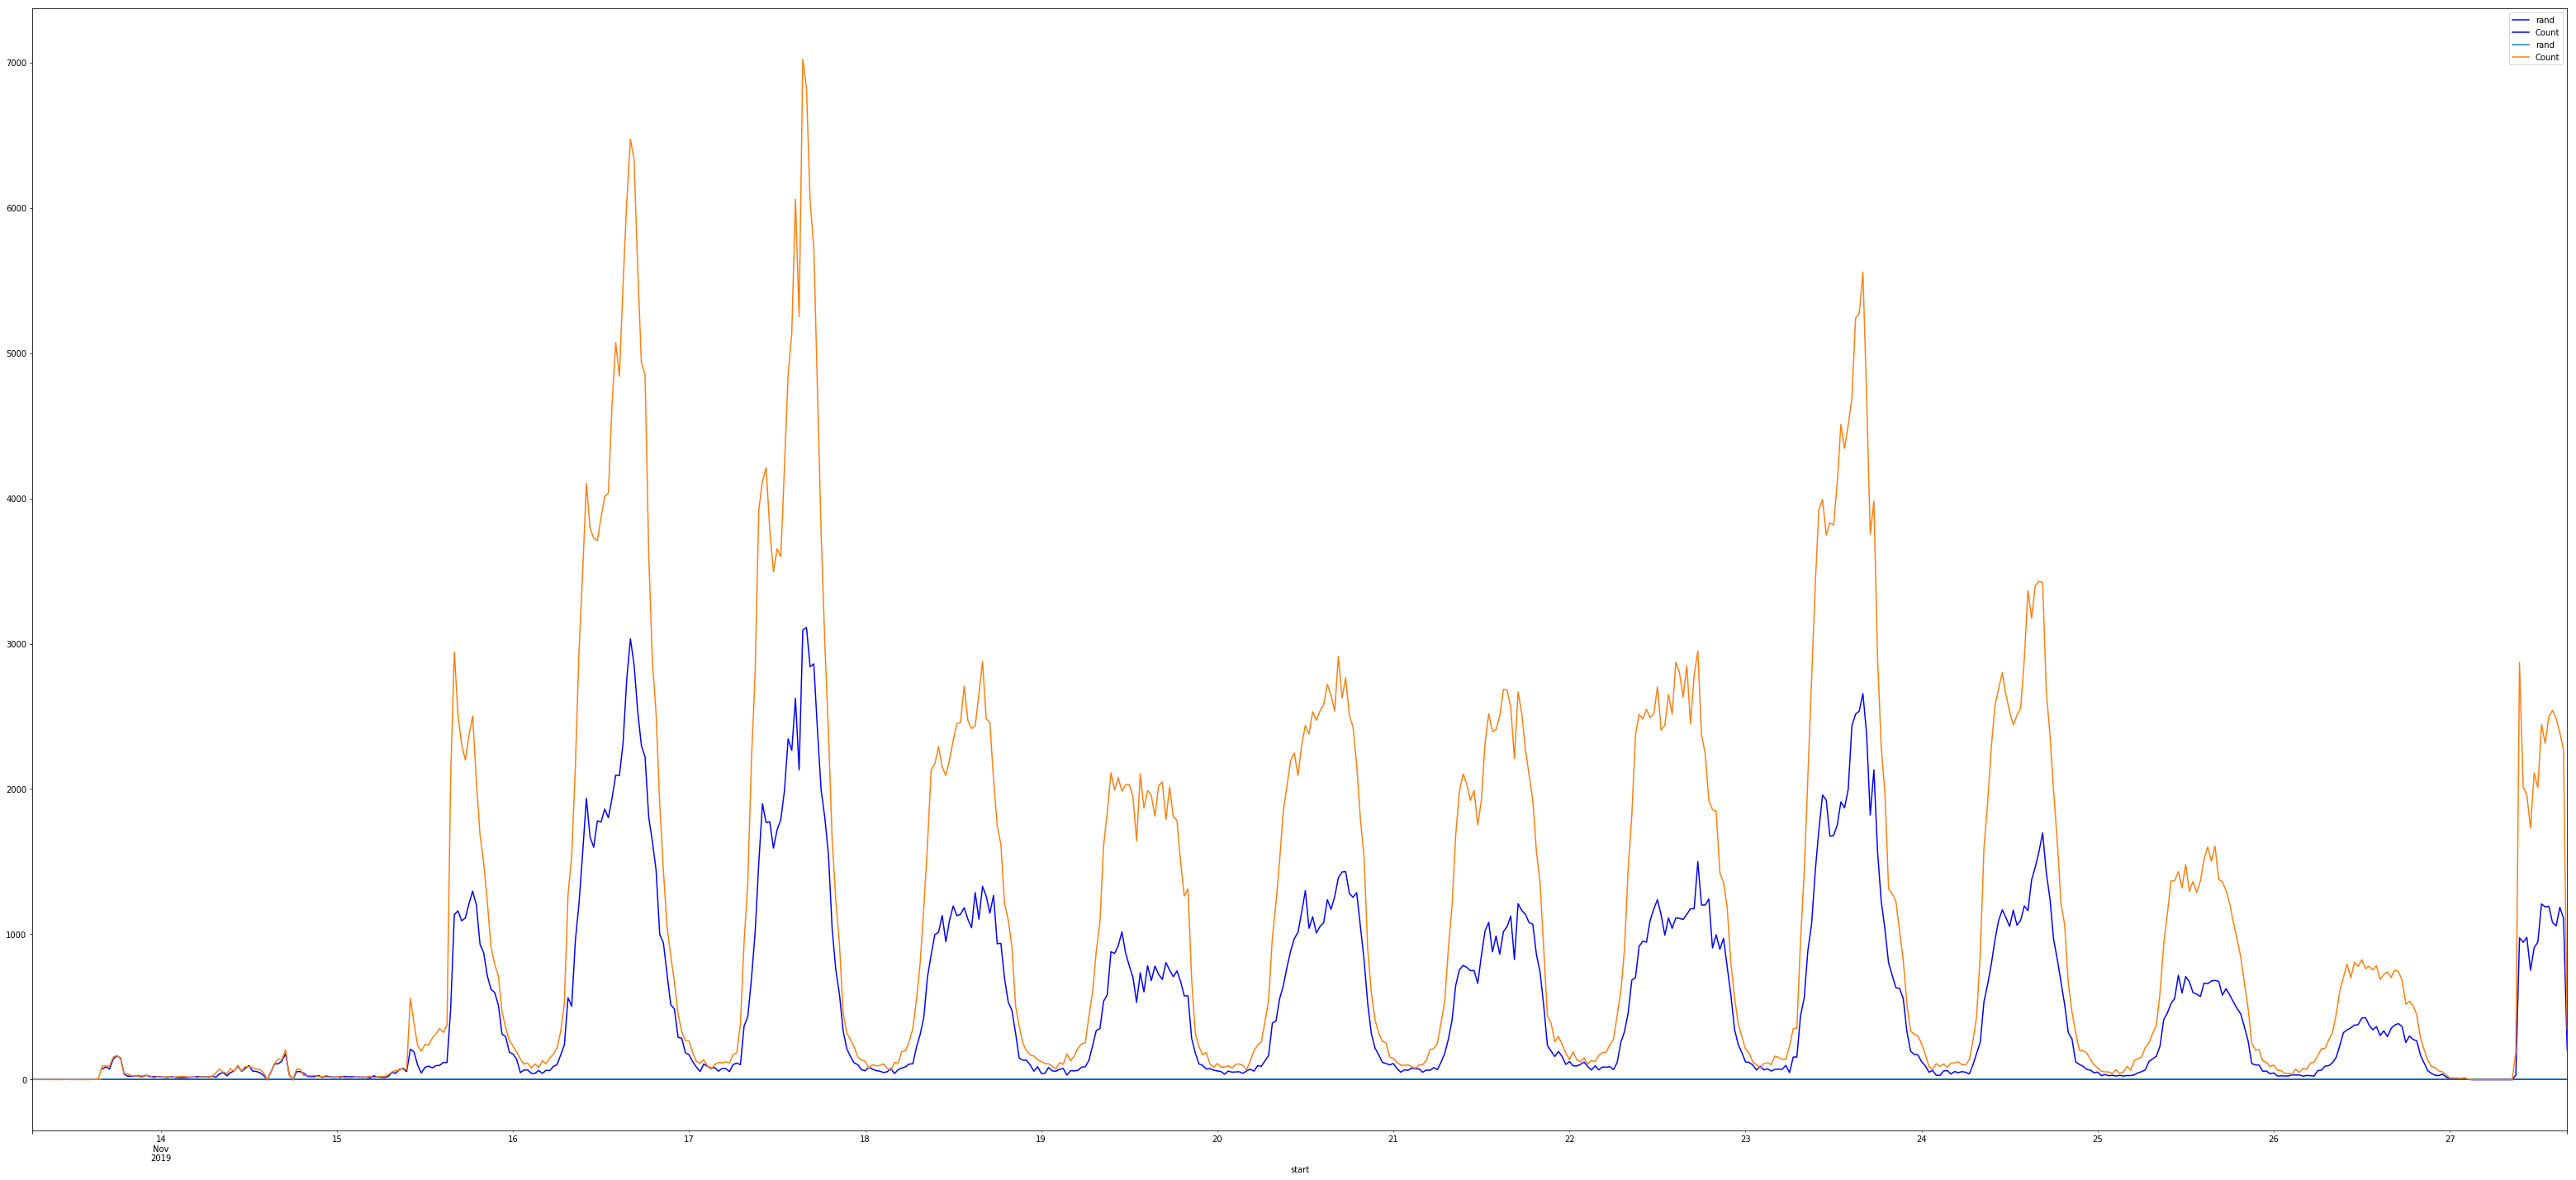

In [118]:
df.index = pd.to_datetime(df.start, unit='ms')
df.set_index(df.start)

dft = df[df['rand'] == True]
dff = df[df['rand'] == False]

tt = dft.resample('30min').sum()
tf = dff.resample('30min').sum()

ax1 = tt.plot(color='blue',figsize=(55,25))
_   = tf.plot(ax=ax1)


In [133]:
time  = pd.DatetimeIndex(tt.index)
g = tt.groupby(time.hour).sum()
g.head()

rand  Count
start             
0        28   2053
1        28   1426
2        28   1407
3        26   1345
4        26   1285

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats # For in-built method to get PCC


df          = pd.read_csv('csv_oneday.csv')
df['start'] = pd.to_datetime(df['start'].astype("datetime64[ms]"))

## -------
# Cleaning data for the 13th
m             = (df.start.dt.day==13)
df['start']   = df['start'][m]
df['rand']    = df['rand'][m]
df['Count']   = df['Count'][m]
 
df.dropna(how = 'all', inplace = True)

## -------
# Ordering data for datetime
df.index = pd.to_datetime(df.start, unit='ms')
df.set_index(df.start)

## -------

# Random True
dft = df[df['rand'] == True]

# Random False
dff = df[df['rand'] == False]

# Resampling on a 30minutes bin
tt = dft.resample('10min').sum()
tf = dff.resample('10min').sum()

del tt['rand']
del tf['rand']

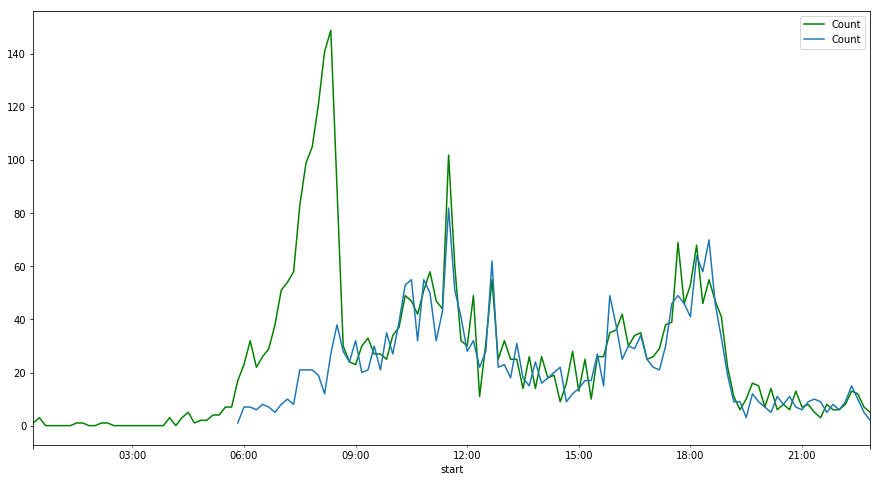

In [100]:

ax = tf.plot(color='green',figsize=(15,8))
_  = tt.plot(ax=ax)

shape true:  103 shape rand:  103


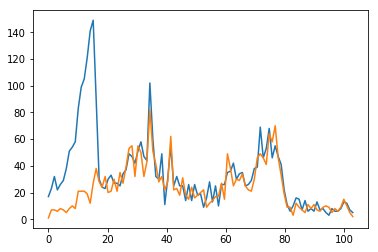

In [113]:
mac_true = tf.Count.values
mac_true = mac_true[33:]
mac_rand = tt.Count.values

#mac_true = mac_true[20:]
#mac_rand = mac_rand[20:]

print('shape true: ', mac_true.shape[0], 'shape rand: ', mac_rand.shape[0] )

data = {'true':mac_true, 'rand':mac_rand}
data = pd.DataFrame.from_dict(data)

plt.plot(np.linspace(start=0, num=mac_true.shape[0], stop= mac_true.shape[0]),mac_true )
plt.plot(np.linspace(start=0, num=mac_true.shape[0], stop= mac_true.shape[0]),mac_rand )

X = mac_rand
y = mac_true



intercept:  [14.560413] coef:  [[0.27409393]]
Pearson Correlation Coefficient:  0.4550587155546499 and a P-value of: 1.3704915127235868e-06


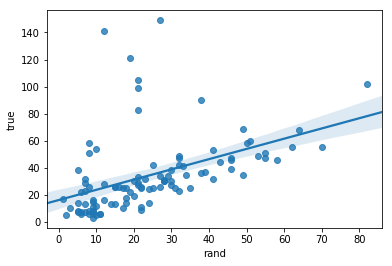

In [117]:
# Linear Regression
reg = LinearRegression().fit(y.reshape(-1, 1), X.reshape(-1, 1))
reg.score(y.reshape(-1, 1), X.reshape(-1, 1))
print('intercept: ', reg.intercept_ , 'coef: ', reg.coef_)


ax = sns.regplot(x="rand", y="true", data=data)



pearson_coef, p_value = stats.pearsonr(y, X) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

Therefore, when estimating crowd density, we ignore the MAC devices that have randomized addresses
and at the end we multiply the crowd density by a factor to account for the discarded MAC devices. 
This factor is derived from the slope of the linear regression fit of the two time series, 
which in our case turns out to be 0.2, with a standard error of 0.006.


Remark 3 In our proof we assumed that all MAC addresses are fixed, i.e. that there are no randomized addresses. 
However, as discussed in “Estimation under MAC address randomization” section, in reality we omit the randomized 
addresses from the analysis and at the end we multiply the estimation by a so-called randomization factor. 
Note that, again due to the law of the large numbers, the larger the crowd, the more precise is the estimation of 
this factor, when it is re-estimated in real time. This means that the above convergence would not be affected by 
the randomization factor. However, in the follow- ing subsection we also confirm this experimentally.

ref:https://doi.org/10.1186/s40537‐019‐0194‐3

Count
end                       
2019-11-21 00:00:00    295
2019-11-21 01:00:00     65
2019-11-21 02:00:00     57
2019-11-21 03:00:00     71
2019-11-21 04:00:00     60

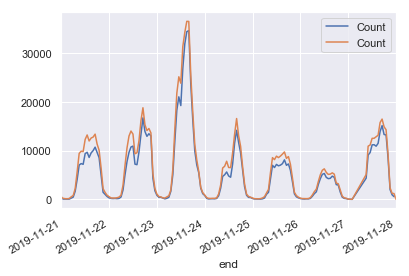

In [246]:
ow = pd.read_csv('csv _visits_2128.csv')


ow['end'] = pd.to_datetime(ow['end'].astype("datetime64[ms]"))
ow.index = pd.to_datetime(ow.end, unit='ms')
ow.set_index(ow.end)

owt = ow[ow['rand'] == True]
owf = ow[ow['rand'] == False]

del owt['rand']
del owf['rand']

del owt['end']
del owf['end']

ax1 = owt.plot()
owf.plot(ax=ax1)

owt.head()


intercept:  [36.77130716] coef:  [[0.4449295]]
Pearson Correlation Coefficient:  0.9967601190090483 and a P-value of: 1.4011715566804448e-25


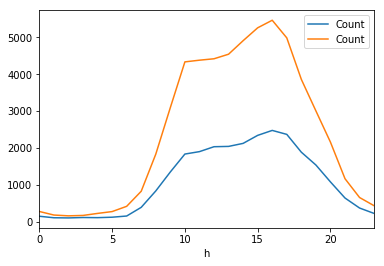

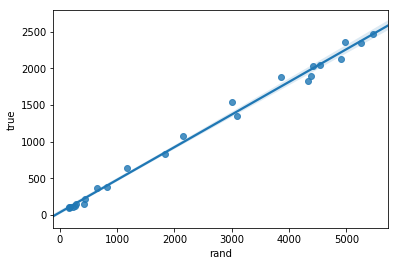

In [242]:
ow = pd.read_csv('csv_visits_2128_rcount.csv')


ow['end'] = pd.to_datetime(ow['end'].astype("datetime64[ms]"))
ow.index = pd.to_datetime(ow.end, unit='ms')
ow.set_index(ow.end)

owt = ow[ow['rand'] == True]
owf = ow[ow['rand'] == False]

del owt['rand']
del owf['rand']

del owt['end']
del owf['end']


dft = owt.groupby([owt.index.hour.rename('h'), owt.index.day.rename('d')])['Count'].mean().reset_index()
dff = owf.groupby([owf.index.hour.rename('h'), owf.index.day.rename('d')])['Count'].mean().reset_index()

del dft['d']
del dff['d']
 
tt  = dft.groupby('h').mean()
tf  = dff.groupby('h').mean()

ax1 = tt.plot()
tf.plot(ax=ax1)

X = tt.Count.values
y = tf.Count.values

data = {'true':X, 'rand':y}
data = pd.DataFrame.from_dict(data)

# Linear Regression
reg = LinearRegression().fit(y.reshape(-1, 1), X.reshape(-1, 1))
reg.score(y.reshape(-1, 1), X.reshape(-1, 1))
print('intercept: ', reg.intercept_ , 'coef: ', reg.coef_)


plt.figure()
ax = sns.regplot(x="rand", y="true", data=data)



pearson_coef, p_value = stats.pearsonr(y, X) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

In [230]:
np.sum(y) + np.sum(X)*0.45

477103.4